In [1]:
#importing required libraries
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
%matplotlib inline

In [2]:
batch_size = 32
num_classes = 10
epochs = 10
data_agumentation = False

In [3]:
#assigning the training and testing data to the model
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
#printing the shape of x_train, x_test, y_train and y_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
#scalining
x_train = x_train.astype('float32')
x_test =x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test / 255.0

# **1) Sequential Model**

In [5]:
#importing required libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

epochs= 25
batch_size =64 

#creating the sequential model
model = Sequential([
  #input layer
  layers.Conv2D(32, 3, padding='same', input_shape=(32,32,3), activation='relu'),

  #hidden layers
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),   #convolution 2D layer with activation relu
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),  #convolution 2D layer with activation relu
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),  #convolution 2D layer with activation relu
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'), #convolution 2D layer with activation relu
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'), #convolution 2D layer with activation relu
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(1024, activation='relu'),  
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  #output layer
  layers.Dense(10, activation='softmax'),

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [6]:
#compilimg the model
optim = keras.optimizers.Adam(learning_rate=0.0009)
model.compile(optimizer=optim,
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [7]:
#fitting the model
history = model.fit(
  x_train,y_train,epochs=25,batch_size=batch_size,
  validation_data=(x_test,y_test),shuffle = True
)

Epoch 1/25
782/782 [==============================] - 23s 12ms/step - loss: 1.6464 - accuracy: 0.3870 - val_loss: 1.3497 - val_accuracy: 0.5186
Epoch 2/25
782/782 [==============================] - 9s 11ms/step - loss: 1.1711 - accuracy: 0.5798 - val_loss: 1.0625 - val_accuracy: 0.6222
Epoch 3/25
782/782 [==============================] - 9s 11ms/step - loss: 0.9618 - accuracy: 0.6617 - val_loss: 0.8529 - val_accuracy: 0.7025
Epoch 4/25
782/782 [==============================] - 8s 11ms/step - loss: 0.8328 - accuracy: 0.7062 - val_loss: 0.7757 - val_accuracy: 0.7291
Epoch 5/25
782/782 [==============================] - 8s 11ms/step - loss: 0.7438 - accuracy: 0.7396 - val_loss: 0.7474 - val_accuracy: 0.7462
Epoch 6/25
782/782 [==============================] - 9s 11ms/step - loss: 0.6780 - accuracy: 0.7624 - val_loss: 0.7177 - val_accuracy: 0.7513
Epoch 7/25
782/782 [==============================] - 8s 11ms/step - loss: 0.6229 - accuracy: 0.7816 - val_loss: 0.6681 - val_accuracy: 0.774

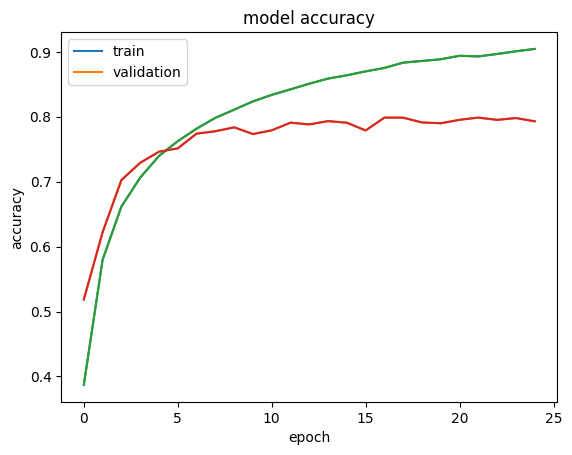

In [8]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy') #main title
#labels
plt.ylabel('accuracy')
plt.xlabel('epoch')
#legends
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 2) **Functional**

In [9]:
#importing required libraries
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Input

#creating the model 
#input layer
i =  Input(shape = (32,32,3))
x = Conv2D(32,3, padding = 'same', activation='relu')(i)   #convolution 2D layer with activation relu
#hidden layer
x = layers.Dropout(0.2)(x)
x = Conv2D(32,3, padding = 'same',activation='relu')(x)  #convolution 2D layer with activation relu
x = layers.MaxPooling2D()(x)
x = Conv2D(64,3, padding = 'same',activation='relu')(x)  #convolution 2D layer with activation relu
x = layers.Dropout(0.2)(x)
x = Conv2D(64,3, padding = 'same',activation='relu')(x)  #convolution 2D layer with activation relu
x = layers.MaxPooling2D()(x)
x = Conv2D(128,3, padding = 'same',activation='relu')(x)   #convolution 2D layer with activation relu
x = layers.Dropout(0.2)(x)
x = Conv2D(128,3, padding = 'same',activation='relu')(x)   #convolution 2D layer with activation relu
x = layers.MaxPooling2D()(x)
x = Flatten()(x)
x = layers.Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = layers.Dropout(0.2)(x)
#output layer
o = Dense(10,activation='softmax')(x)
model = Model(inputs=i, outputs=o)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                             

In [10]:
#compiling the mode adam optimizer
optim = keras.optimizers.Adam(learning_rate=0.0009)
model.compile(optimizer=optim,
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [11]:
#fitting the model
history = model.fit(
  x_train,y_train,epochs=25,batch_size=batch_size,
  validation_data=(x_test,y_test),shuffle = True
)

Epoch 1/25
782/782 [==============================] - 12s 12ms/step - loss: 1.6191 - accuracy: 0.4009 - val_loss: 1.2649 - val_accuracy: 0.5375
Epoch 2/25
782/782 [==============================] - 9s 11ms/step - loss: 1.1586 - accuracy: 0.5828 - val_loss: 0.9877 - val_accuracy: 0.6515
Epoch 3/25
782/782 [==============================] - 9s 12ms/step - loss: 0.9521 - accuracy: 0.6657 - val_loss: 0.8736 - val_accuracy: 0.6946
Epoch 4/25
782/782 [==============================] - 9s 11ms/step - loss: 0.8265 - accuracy: 0.7065 - val_loss: 0.8524 - val_accuracy: 0.6966
Epoch 5/25
782/782 [==============================] - 9s 11ms/step - loss: 0.7351 - accuracy: 0.7426 - val_loss: 0.7470 - val_accuracy: 0.7369
Epoch 6/25
782/782 [==============================] - 9s 11ms/step - loss: 0.6741 - accuracy: 0.7648 - val_loss: 0.8005 - val_accuracy: 0.7242
Epoch 7/25
782/782 [==============================] - 9s 12ms/step - loss: 0.6142 - accuracy: 0.7846 - val_loss: 0.6835 - val_accuracy: 0.763

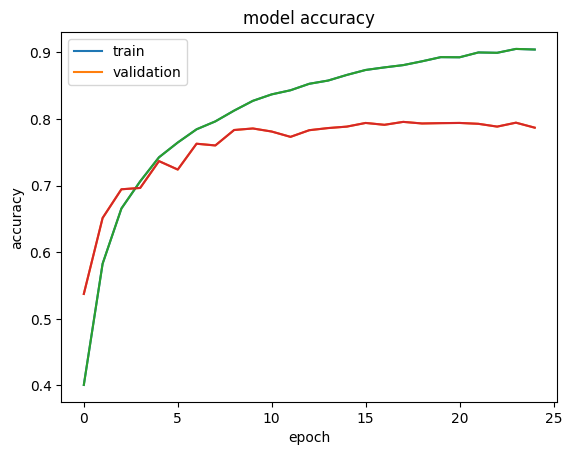

In [12]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
#labeling the axis
plt.ylabel('accuracy')
plt.xlabel('epoch')
#title
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **2.1) Model checkpoint**

In [13]:
#importing required libraries
from keras.callbacks import ModelCheckpoint
checkpoint_filepath = '/tmp/checkpoint'
keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto')

# **RedudceLROnPlateau**

In [14]:
#importing required libraries
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 5, min_lr = 0.001)

# **EarlyStopping**

In [15]:
#importing required libraries
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose =1 , patience = 200)
history = model.fit(x_train,y_train, validation_data = (x_test, y_test),epochs=1, verbose=0,callbacks=[early_stop])

# **3) Saving the model**

In [16]:
model.save("model1.h5")

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


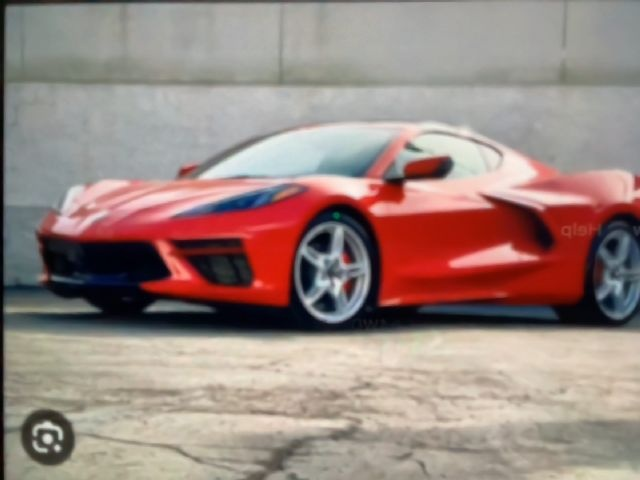

In [30]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes



  # initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename



try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **4) Predicting 4 images from external image data**

In [31]:
#there are 10 classes in cifar10 dataset which are
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [32]:
#it is a url of an airplane image from google
url_data = {
         'airplane' : "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISDxUPDw8PFRUVFRUVFQ8VFRUVFQ8VFRUWFhUVFRUYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFRAQFS0dFR0tLS0tLSsrLSsrLSstLS0tLS0tLSstLS0tLS0tLS0rLS0tKystLTcrLS0tKysrLS0tN//AABEIALcBEwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAAAQIDBAUGBwj/xABBEAACAgEBBAgDAwkGBwAAAAAAAQIRAwQFEiExBhMiQVFhcZEygaFCwdEUIzNDUmJykrEHNFPh8PEVFmOCk6LS/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/xAAgEQEBAAICAwEBAQEAAAAAAAAAAQIRAxIhMUETUYEE/9oADAMBAAIRAxEAPwDJQyKGj2vMYAMIEh0CGFJASokokFdAWUJxAihoVDCGMSAKdhQgQDGkJDAkIKAAoaAdEU0MSJUBFog0WUDQFVAWUJxGxCgcSSQ6Ar3QosodDYrSJJE1EaiNiG6BdugTY1dkkypMkmdGdp2OyFjTAmNMhYJkFiZKyqx2BcpBZVY7IqygIJklIABgACGCJIAiSoVDRAUInQUFJEkFAA0MAIHQUCJEVDdCiyhMbFe6G6TQAV0OidANhIaEKwJ2MrsANTYWIDs5pgRsLAnYWRsCCdgmRCwLFIakVWOxo2tse8U7w0xpdr0wKlIlvEFlj3ireDeGja7eJqRjKRZGRNKvTJIpUiakSqsYqGmDIESRELIJpjK7BSGhZYEFILCpWFkbCwJWFkbFYDBisLAQDAqNQIBnVzCGJDAYWEYt8k36Fn5PP9if8rG4K7AGq5ibAdgIYDsaZELAnYWQsLGhOwsgNMaFiZNMqTJJkWLkyaZUmYm1tow02Lrst07UYrnkl4R+99xmtRftPamPT4+tyulySXGU34RXezLwZd6KlUo2k918Gr40/M4XYOPJrtV+V6j9HifYx/ZUuaivGuDb7+Hy7lSILLCyFisaE2xWRbCwJWPeK7G2BPeDeK7HY0JuQkyNgmBOxkLCwqdgQ3gGk21gxAdGGx2XoceS3kzxhX2ecn+CM3aOxsbx1pNSo5U005qM4yr7Lj3X48TnM+He72muUl3fijF/LcmJ/nL8pdz+fccOXvPV8O2HX/XcbF29qXKOHNoXjttPLBp41u977lddzfNHSLVI8x0+3P3n7mwjt5qrnw734er7jy2O8r0C4S57j9UnZi5djaefPDBecbj/AEOb0W3o1z8rty+vzLV0kyRjKUsLmkssqxSUpNQa6uKi+LnJXw5KiTc9U8X22OfonhfwSyR+aa+q+81uo6I5V+jyQl63F/evqbLD0ixb27KTT3nFKSatqCySp8qS7+XA2Wl2lCaTjKMk0mnFpppq0+Hczc5c59ZvHjfjh9RsXUQ+LDP1XaX0swZRa4NNeTPUI54vvFm0+PIqnGEv4kvvOk/6b9jF4Z8ry8DvdT0X08uKjKHnF8PZ2jV6joe/1eZPykq+q/A6znwrneLKOWGja6jo7qIfq95eMWn9Of0MOeiyRaUoSTldRa48O+uaOkzxvqsXGz4oRdp8Epuopv7vU2ezthuXHJwXh/n+HudBp9LDGqS/15HPPlk9OmPHb7arQ7ESV5OPl3exh9IdgabqZJvJGU6SSm521xSanfZT8KN5r9ZHHHek/RePkvxOU1GdzlvP5R7orwRjCZZXdaysxmmPo9NDFBY8cUoruXu36mQmV2STO7knY0yCJEEhWKwsKdhZEYQxMxtdrseGDyZpqEV3vvfhFc2/JHnvSLpbkz3jxXjxcv38i/ea5LyXzbC6dNtbplhw5erjF5a+OUGqg/Djwk/nwM3YnSTDqpOGNZFJLecZRqlaXNNrvPJz07obsn8n0+9NVkyVKXjFfYj8k79WwtdFYJle8G8VlbYFe8MaXbCAANsAJK1TVrw8QADXZ9kwfGDlB+XFez+4w56DPH4XGfo6fs+H1N4Bi8eNamdjnnrMuP44TS8ade/Isw7VTe8nx5Wn4f7m9MfPocU+M8cG/GlfuuJzvD/K3OX+xXh2u+W/a8HxRlYdfC7eNcXjk3FuO91X6NOuaXgamXR6HHdyZou21TTSXcqkmY2TZGpj+jzYp+UlKD91a+hzvDW5yR2Gk2u4pbuoyP8ASusnbuWR70bfNRjdJLu4dxtdJt/KlFPqp8cUXKL3KVfncjT8HyijzLJqdViTeTTTaXOUJRmq8fEMHSbGpbs3KD8JRlGjneO/xuZPZsW2l1ix9q3Fy3kuykmlTl48eXkzMw7XxybismNtPdcbVqSW8143Ts8+2HqseSHWLWY1FVfai6t0rSdr5nQPY8MnCSxT+Pj8Mu3Hcm01Ttx4N8znZprbrI6mL/yZN7r4WvRnM6XQvFvbqmrUY025RhuxUVuxfJUuPiQxZNVjhSnjzOOKKW+urllzJ1KcmuEYtcaS5k0u3Ty068PYx8mj8JcfM1S23KMqngypb80pxqS3YQ3uslXwpu4pc7MrT9IcUqXWJN9X2Z9mSeVNwjUvtNJ8OfAvlPDVbZ2JnnPejGMklSSfH52aPPocsPjxzj5tOvc9Bx6uL48PVMsWSL7zrjzWTWmLxS+XmlEkeg59mYcnxY4PzXB+64ms1HRfE/glOPk+0vrx+p1nPjfbneK/HJAbzP0Yyr4JQl7xf14fU53bOpjpP70p41+08eRxfpNRp+50meN9Vm42fF9iNE+l+i/x2/SGT/5Kc3TXSJXGWWb/AGVBq/5qRpNV0ZoOkXSjHprxwrJl/YT7OP8Aja5fwrj6cznNtdNcmWPV6eMsSa7WRu8j8otcILzVvzRybIsjL2ntLLqJ9Zmm5PuXKMF4Rj3L/TsxAJQi21GKbbaSS5tvgkgredD9k9fqFOS/N4qlLwlL7MfdW/JeZ6XZrdg7MWm08cXDe+Kcl9qb5/JcEvJI2FmmLUrCxCCJWIVABQMQGkAxBYQxAAAAAAhgMAo123csI4ZSyRi1UviSfHclXPzo2VGu25slanF1byShTtNJP3XeiZemsfFc70b2vHBvSx5+qk64dVCcMtd0+9c33Pv5HRaPpxKD7WHBJeONuHzUeSOQ1HRLVY1LqnDInwdPdk16S/E1GfR6nD8eHNHzp17rgcbjL7jrL/K906M9NcWpvGmoyi+OOc47z80ubXrR06yQl3HzZo9ianLFZceKXadrJvRVU6vi7PT9iZ9Rhik805Jfq8jWRLh9mdRl72zleHfpv9Ne3d6nEkrujSbRm406jKnvK1xTXJrz4vj5lmn27F8Mqavu+KP4/wBTQbb6NvJeXZ2ryYZd+FOUsEvSHKD+VeRz6We2u0vo4auEU4w38fY6tPHJrcjvb3ZXJO+/mbLT7dnvJrPFxeRylGUeMce5Sxwa796nbvvOB1mzNpYnbliyvhca3ZW/Sk/Ux5bWz4/7xps0f3q3o/zI1eOp2j1TS9JMm6uswpvdjbxSUlvSnuuKTp0lUm2ZuHpZgupTcOGSX5yMordxTUJTtqkraq+ado8hl0oxxx76bfcoq02/DiS2BtTNNyz6jLJqaqOBtvHGPjuPg3w5sz+f1ez3TDtCMrpp06dU6fg6Llni+H0Z5Itdjbvd3ZPrO3BuMk8qUckk19ppLibPS7dlGSa1E93ei3CSjLsRx7m4m+Kt1Jvnd+Jjq1t1O1uhGzdTby6TEpP9ZjvFO/G4Vfzs4rav9jMH2tHrZL/p5oqS/wDJCq/lZ0i6Uwr4kZOk6T45cd5LyNTLOfUsleO7X/s72lp7b0sssV9vA+tX8q7f/qcvkg4ycJJxkucZJqS9U+KPpSfSLhcKf9DnX0x0eqbw67Bg8Es2NSin4qbvv5cEdcea/YzcI8LO/wD7J+jyy5pa3NFOGLs40+UsjXGXpFP3kvA7LUdBNl6hNw08sV8smnzNp8Oe7K4r2Ml6bHpNPDRaeb3YrinGpu7blJrg3J2+SNfp28T2z16+aq2nmjOfYilFcLSS3vMw6J0KjvJqON8oNAkSoKKhASoAMQAA0yAAAABgAh0FDAQxgQADAKBoQWBIZCwsCQ4yadptPxXBkLCxoZkdozqp7s14SXH3XE1+vnkcX1CxRl+9vOK9iwdmesnprtXFYOiWfJqes1mSDjdy3W7yfupUt1eJvH0X0/2Oux/w5JNL5StG5AdYdq0v/LtfDqJ/90Yv+lC/4Fk7s6+cX+JvAsl48f4vfJopbDy/48fZkcOxc9drLBO34u142joCSJ+eK/pXO5djalPsZYP5yjRLH0YcuOXNx8Iq/q/wOhskifnid61uzdjdQ7xajPHyTik/VNNHQR1zkt3LFTX7XKS+7+hhokkOkO1TzY484yteD4SXqvwKqJCZqIVCYAVAAWMDBChgbYFANDoKVAMdARGOgsAoBNkbIJWKxWBUOwsiMB2FiABjEMAGIYUAAwGgEOyBjEBBKyUWQGmFWpkrKUyVk0qyxMjYAAAAAMQAYiQ6GM0yVAkFibAkKyNisok2RsQBBYAAAAwAAAAAYAAwAYCGABQMAABiAgYWRHYDsdkBgSTJJkRgTTHZCxpkXaQCsYVICNjIMSwsQG2QACCGIAAAAaQCGAAADCgEAxgKhgAANCGAwEAUwAAABjoCNBRKgogjQyVBQCGOh0BEaJKINEUkMBAMYgCsQAA0wYAAAAAADAAABgAUAAAAMAEFjABDAAoGAAAwAgYAADAAAdDQAFBZCIAZqrN0TgICKg4kaGBUFAAFNP/Z",
        
          }

1/1 [==============================] - 0s 31ms/step


(-0.5, 31.5, 31.5, -0.5)

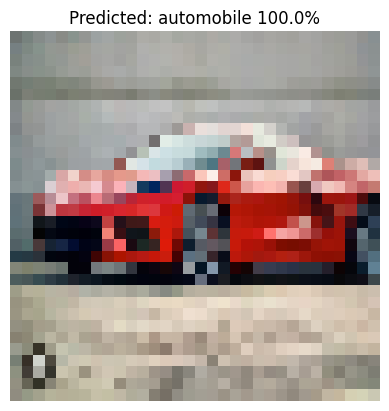

In [35]:
import numpy as np

path="/content/photo.jpg"
image = keras.preprocessing.image.load_img(path, target_size=(32, 32))
img_arr = keras.preprocessing.image.img_to_array(image)
img_arr = tf.expand_dims(img_arr, 0)
    #predicting the image
predictions = model.predict(img_arr)
pred_class = np.argmax(predictions)
pred_label = f'Predicted: {classes[pred_class]} {round(predictions[0][pred_class]*100,2)}%'
score = tf.nn.softmax(predictions[0])
plt.imshow(image)
plt.title(f'{pred_label}')
plt.axis('off')



# pred()
